In [ ]:
# install image with file id
!gdown '1_N8qe3XWwKbCeXKAkvH8gnR-Uvcvd5i2'

Downloading...
From: https://drive.google.com/uc?id=1_N8qe3XWwKbCeXKAkvH8gnR-Uvcvd5i2
To: /content/LAB03 PIC1.png
100% 729k/729k [00:00<00:00, 10.5MB/s]


# Section 1
Read and show the image

In [ ]:
# install image with file id
!gdown '1_N8qe3XWwKbCeXKAkvH8gnR-Uvcvd5i2'

Downloading...
From: https://drive.google.com/uc?id=1_N8qe3XWwKbCeXKAkvH8gnR-Uvcvd5i2
To: /content/LAB03 PIC1.png
100% 729k/729k [00:00<00:00, 35.5MB/s]


In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Answer your code here
dog_pic = cv2.imread("/content/LAB03 PIC1.png")


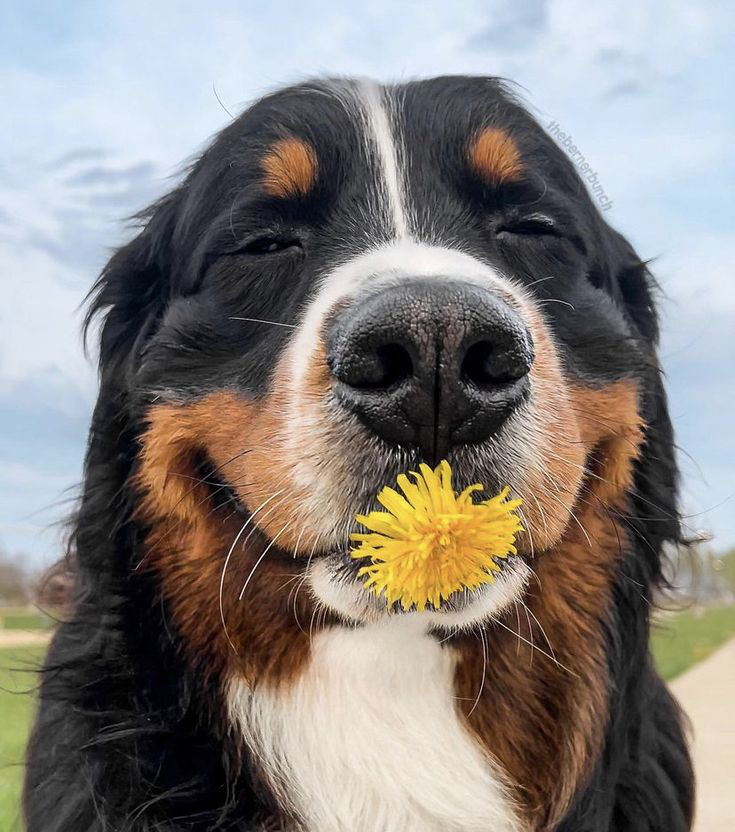

In [ ]:
cv2_imshow(dog_pic)

# Section 2
Use cv.resize() for scaling the image to 50% of the original size and show the results.

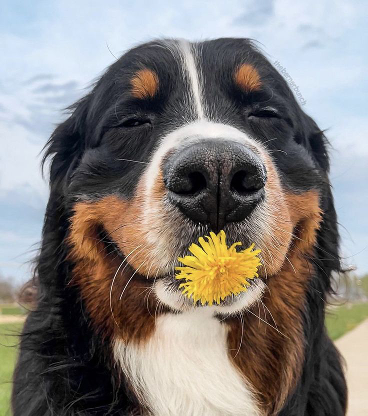

In [ ]:
# Answer your code here
dog_pic_resize = cv2.resize(dog_pic, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
cv2_imshow(dog_pic_resize)


# Section 3
Apply theory of *object tracking* to extract blue colored of dog image and

write the code to:

  1. Convert from BGR to YCrCb color-space.  (Use image from section 1)
  2. Threshold the YCrCb image for a range of blue color.
  3. Extract only the blue position of image.

  



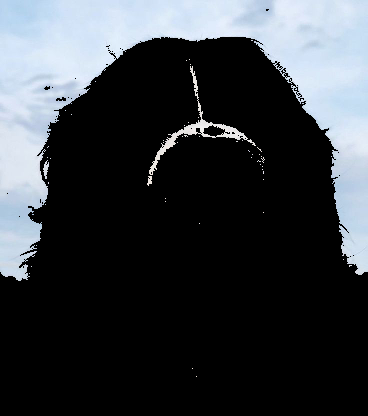

In [ ]:
# Answer your code here
### use RGB color space
dog_pic_resize_rgb = cv2.cvtColor(dog_pic_resize, cv2.COLOR_BGR2RGB)

lower_blue = np.array([170,170,220])
upper_blue = np.array([240,240,255])

mask = cv2.inRange(dog_pic_resize_rgb, lower_blue, upper_blue)
res = cv2.bitwise_and(dog_pic_resize,dog_pic_resize, mask= mask)

cv2_imshow(res)


# lower_blue = np.array([110, 150, 50])
# upper_blue = np.array([130, 180, 100])

Another object tracking in dog image try to extract only yellow colored of flower.

write the code to:

1. Convert from BGR to HSV color-space. (Use image from section 1)
2. Threshold the HSV image for a range of yellow color.
3. Extract only the yellow position of image.

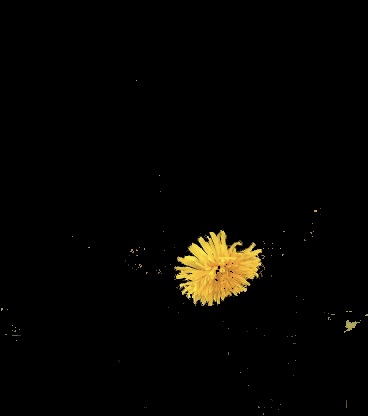

In [ ]:
# Answer your code here
dog_pic_resize_hsv = cv2.cvtColor(dog_pic_resize, cv2.COLOR_BGR2HSV)

lower_blue = np.array([16,100,50])
upper_blue = np.array([30,255,255])

mask = cv2.inRange(dog_pic_resize_hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(dog_pic_resize,dog_pic_resize, mask= mask)

cv2_imshow(res)


# lower_blue = np.array([110, 150, 50])
# upper_blue = np.array([130, 180, 100])

# Section 4
Use the cv.getRotationMatrix2D() and cv.warpAffine() functions and write the code to:

  1. Rotate an image around its center at 45 degrees without scaling.
  2. Rotate the same image around its center at 45 degrees with two different scaling factors like: 0.75, 1.5, etc.
  3. Display the results and explain the impact of the scaling factor on the output.

  



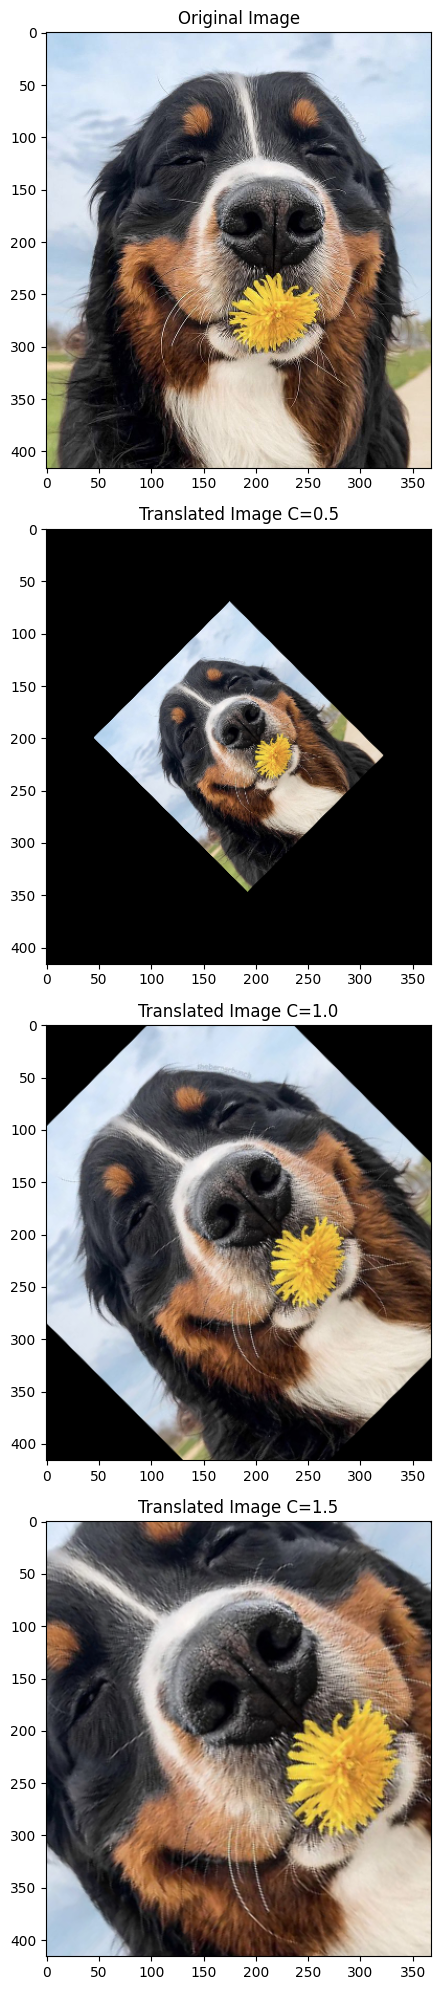

In [ ]:
# Use same image "LAB03 PIC1.png"
# Answer your code here

rows,cols = dog_pic_resize_rgb.shape[:2]

M1 = cv2.getRotationMatrix2D((cols//2,rows//2),45,0.5)
M2 = cv2.getRotationMatrix2D((cols//2,rows//2),45,1)
M3 = cv2.getRotationMatrix2D((cols//2,rows//2),45,1.5)

rotated_img_1 = cv2.warpAffine(dog_pic_resize_rgb,M1,(cols,rows))
rotated_img_2 = cv2.warpAffine(dog_pic_resize_rgb,M2,(cols,rows))
rotated_img_3 = cv2.warpAffine(dog_pic_resize_rgb,M3,(cols,rows))

plt.figure(figsize=(10, 20))
plt.subplot(4, 1, 1)
plt.title("Original Image")
plt.imshow(dog_pic_resize_rgb, cmap='gray')

plt.subplot(4, 1, 2)
plt.title("Translated Image C=0.5")
plt.imshow(rotated_img_1, cmap='gray')

plt.subplot(4, 1, 3)
plt.title("Translated Image C=1.0")
plt.imshow(rotated_img_2, cmap='gray')

plt.subplot(4, 1, 4)
plt.title("Translated Image C=1.5")
plt.imshow(rotated_img_3, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
# Answer
# scaling factor change the image size

# Section 5
 Use cv.getAffineTransform() and cv.warpAffine() functions to apply an affine transformation to an image， use the following points and the input image as the code '1U_l68HuSK9B8DvpOqEf6R2Gs-Ok0rsS6' and then display the results.
- Input points: [[50, 50], [200, 50], [50, 200]]
- Output points:
  1. Output points:[[10, 100], [200, 50], [100, 250]]
  2. Output points:[[50, 200], [200, 50], [100, 250]]

In [ ]:
!gdown '1U_l68HuSK9B8DvpOqEf6R2Gs-Ok0rsS6'

Downloading...
From: https://drive.google.com/uc?id=1U_l68HuSK9B8DvpOqEf6R2Gs-Ok0rsS6
To: /content/checkerboard.png
100% 67.7k/67.7k [00:00<00:00, 4.65MB/s]


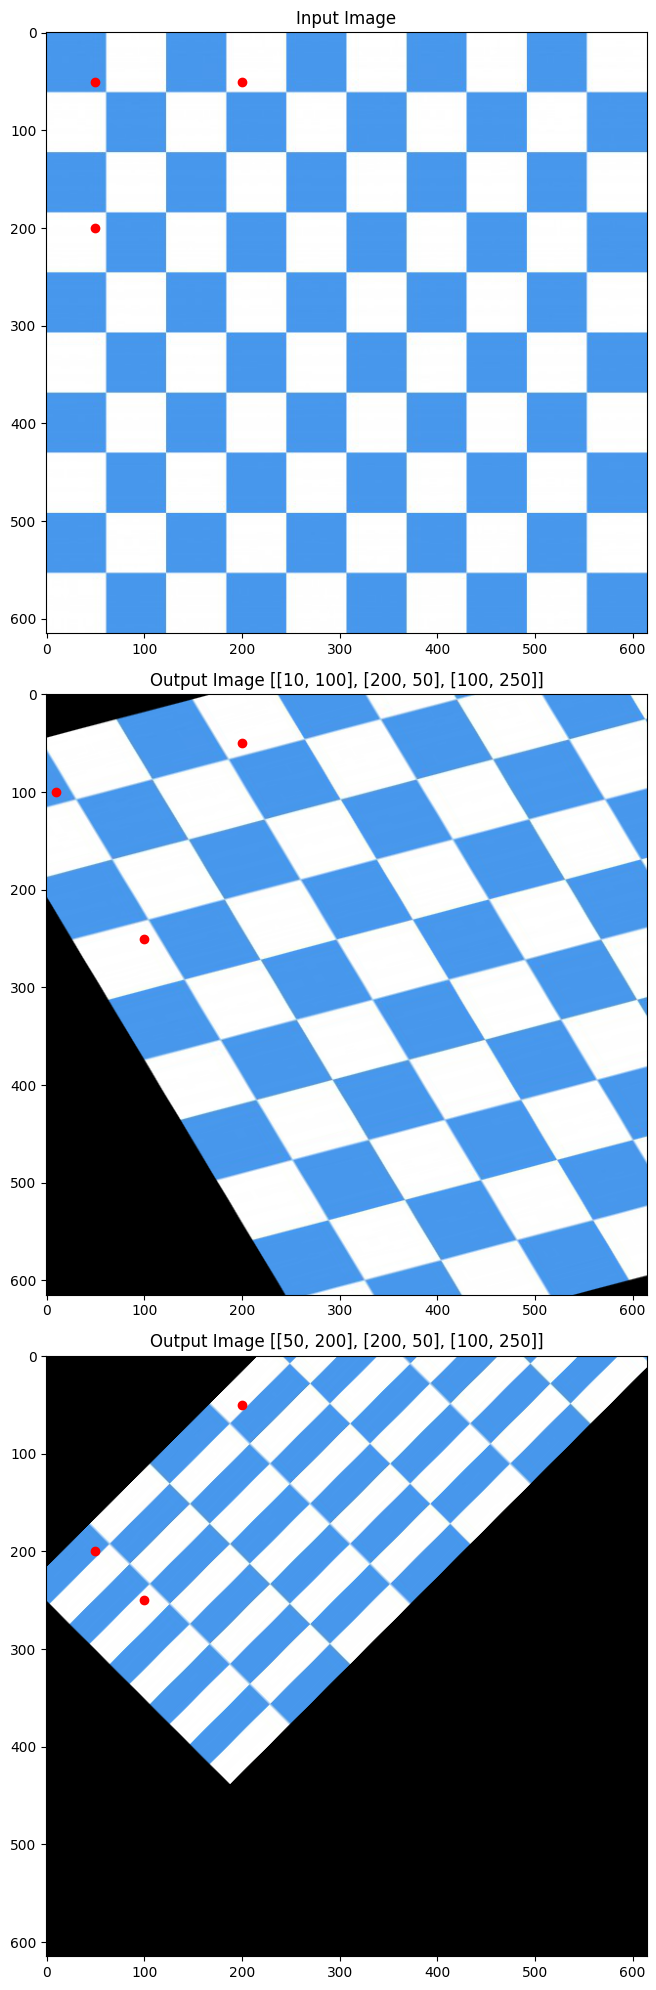

In [ ]:
# Answer your code here

checker_pic = cv2.imread("/content/checkerboard.png")

rows, cols = checker_pic.shape[:2]

input_points = np.float32([[50, 50], [200, 50], [50, 200]])

out_points1 = np.float32([[10, 100], [200, 50], [100, 250]])
out_points2 = np.float32([[50, 200], [200, 50], [100, 250]])


M1 = cv2.getAffineTransform(input_points, out_points1)
M2 = cv2.getAffineTransform(input_points, out_points2)


Affine_transformed1 = cv2.warpAffine(checker_pic, M1, (cols, rows))
Affine_transformed2 = cv2.warpAffine(checker_pic, M2, (cols, rows))

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(checker_pic, cv2.COLOR_BGR2RGB))
x, y = list(zip(*input_points))
plt.scatter(x,y, color = "red")
plt.title('Input Image')

plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(Affine_transformed1, cv2.COLOR_BGR2RGB))
x, y = list(zip(*out_points1))
plt.scatter(x,y, color = "red")
plt.title('Output Image [[10, 100], [200, 50], [100, 250]]')

plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(Affine_transformed2, cv2.COLOR_BGR2RGB))
x, y = list(zip(*out_points2))
plt.scatter(x,y, color = "red")
plt.title('Output Image [[50, 200], [200, 50], [100, 250]]')

plt.tight_layout()
plt.show()


# Section 6
Given the coordinates of a quadrilateral region in an image (pts1) and the corresponding points for a rectangular output (pts2) as follow：

- pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])

- pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
- output size as (300,300)

To do:
  1. Compute the transformation matrix using cv.getPerspectiveTransform().
  2. Apply the perspective transformation to the input image using cv.warpPerspective() with the specified output size (300, 300).

In [ ]:
# Use same image "LAB03 PIC1.png"
# Answer your code here

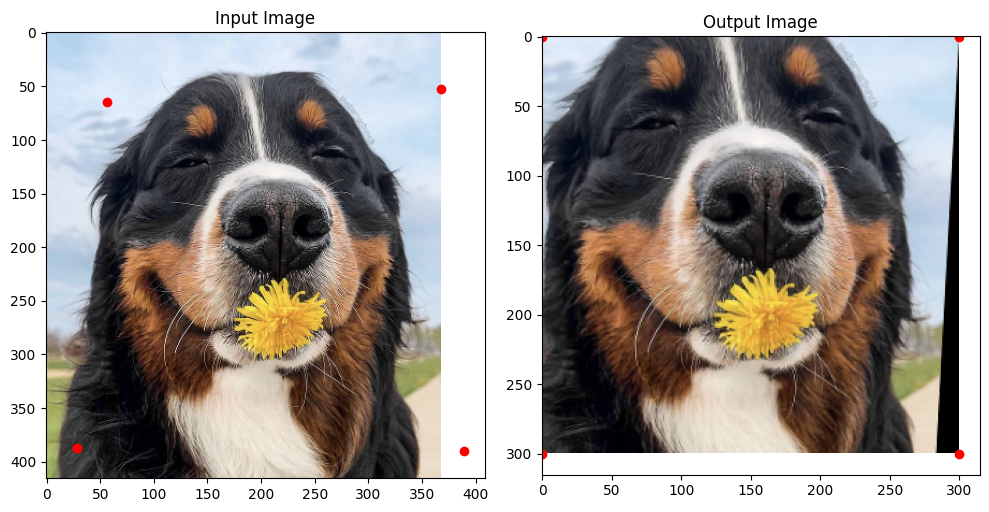

In [ ]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# 1. Generate perspective transform matrix
M = cv2.getPerspectiveTransform(pts1,pts2)

# 2. Perspective transform
Perspective_transformed = cv2.warpPerspective(dog_pic_resize_rgb,M,(300,300))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dog_pic_resize_rgb)
x, y = list(zip(*pts1))
plt.scatter(x,y, color = "red")
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(Perspective_transformed)
x, y = list(zip(*pts2))
plt.scatter(x,y, color = "red")
plt.title('Output Image')

plt.tight_layout()
plt.show()

#Section 7
You need to download new image from the link below (pancake.png). If I want you to create image that has only outline image (follow image below) for giving kids paint the part inside outline of pancake image. Which image thresholding solution will you use to get this type of pancake image ?

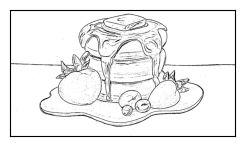

In [ ]:
!gdown '1F377cD-enYDoLSOibSKEZ1oqyqkJ61a8'

Downloading...
From: https://drive.google.com/uc?id=1F377cD-enYDoLSOibSKEZ1oqyqkJ61a8
To: /content/pancake.png
100% 311k/311k [00:00<00:00, 6.64MB/s]


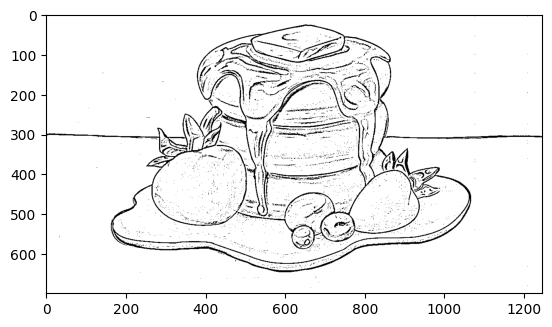

In [ ]:
# Answer your code here
pancake_pic = cv2.imread('/content/pancake.png', cv2.IMREAD_GRAYSCALE)
thresholded = cv2.adaptiveThreshold(pancake_pic, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresholded, cmap="gray")
plt.show()
